In [67]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [112]:
tickerStrings = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'PYPL', 'ADBE', 'NFLX']

df_list = []
for ticker in tickerStrings:
    print(ticker)
    data = yf.download(ticker, group_by="Ticker", period='5y')
    data['ticker'] = ticker  # Add ticker column
    df_list.append(data)


# Combine all dataframes into a single dataframe
print(len(df_list))
df = pd.concat(df_list)
df.reset_index(inplace=True)

AAPL


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT
GOOGL


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN
TSLA


[*********************100%***********************]  1 of 1 completed


NVDA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PYPL
ADBE


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NFLX
9


In [113]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2019-09-26,55.000000,55.235001,54.707500,54.972500,53.193813,75334000,AAPL
1,2019-09-27,55.134998,55.240002,54.320000,54.705002,52.934967,101408000,AAPL
2,2019-09-30,55.224998,56.145000,55.197498,55.992500,54.180809,103909600,AAPL
3,2019-10-01,56.267502,57.055000,56.049999,56.147499,54.330788,139223200,AAPL
4,2019-10-02,55.764999,55.895000,54.482498,54.740002,52.968838,138449200,AAPL
...,...,...,...,...,...,...,...,...
11317,2024-09-19,705.000000,715.659973,695.369995,704.320007,704.320007,4228500,NFLX
11318,2024-09-20,705.549988,706.669983,696.309998,701.030029,701.030029,3998100,NFLX
11319,2024-09-23,702.390015,712.250000,699.159973,705.369995,705.369995,3224300,NFLX
11320,2024-09-24,706.630005,722.440002,704.450012,722.260010,722.260010,3565700,NFLX


In [114]:
df = df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,0,2019-09-26,55.000000,55.235001,54.707500,54.972500,53.193813,75334000,AAPL
1,1,2019-09-27,55.134998,55.240002,54.320000,54.705002,52.934967,101408000,AAPL
2,2,2019-09-30,55.224998,56.145000,55.197498,55.992500,54.180809,103909600,AAPL
3,3,2019-10-01,56.267502,57.055000,56.049999,56.147499,54.330788,139223200,AAPL
4,4,2019-10-02,55.764999,55.895000,54.482498,54.740002,52.968838,138449200,AAPL


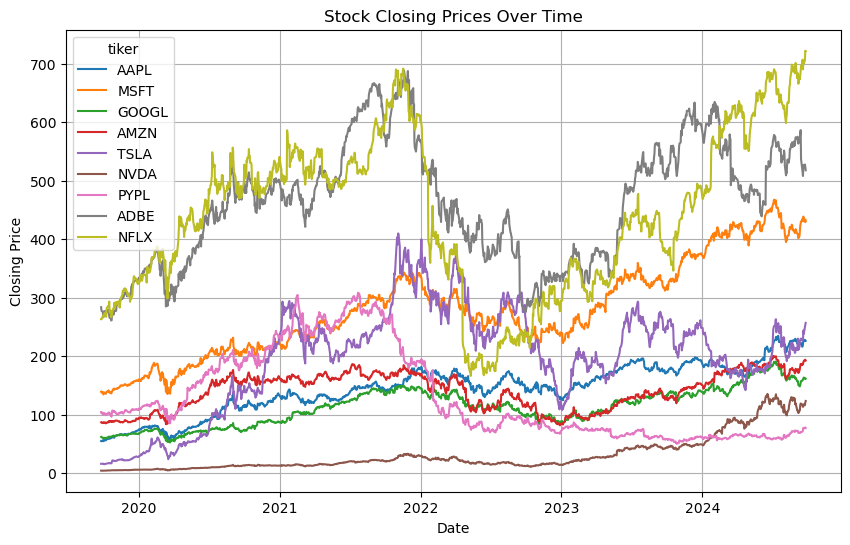

In [115]:
# First, we make sure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Now, we'll plot the data
plt.figure(figsize=(10,6))
for stock in df['ticker'].unique():
    stock_data = df[df['ticker'] == stock]
    plt.plot(stock_data['Date'], stock_data['Close'], label=stock)

# Adding labels and title
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(title='tiker')
plt.grid(True)
plt.show()

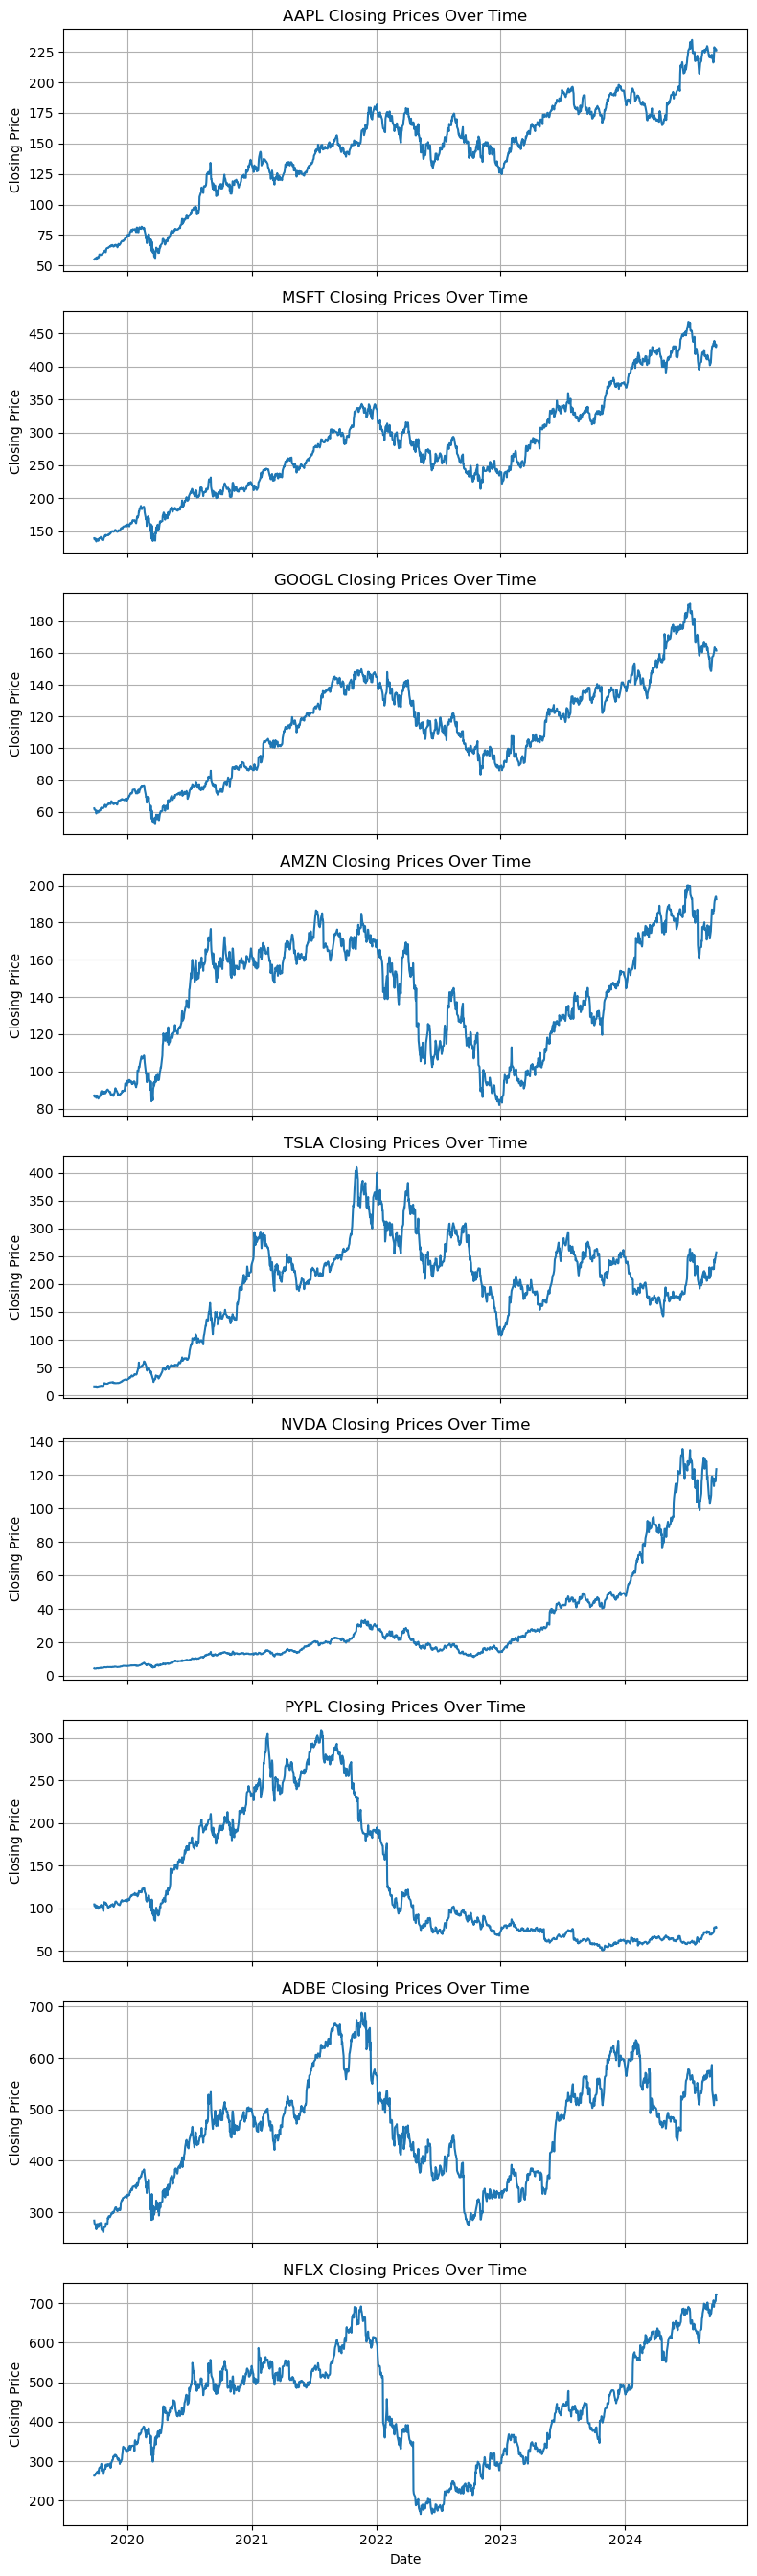

In [120]:

# Get the unique stocks
stocks = df['ticker'].unique()

# Define the number of subplots based on the number of stocks
num_stocks = len(stocks)
fig, axes = plt.subplots(num_stocks, 1, figsize=(8, num_stocks * 3), sharex=True)
# Plot each stock on its own subplot
for i, stock in enumerate(stocks):
    stock_data = df[df['ticker'] == stock]
    
    axes[i].plot(stock_data['Date'], stock_data['Close'], label=stock)
    axes[i].set_title(f'{stock} Closing Prices Over Time')
    axes[i].set_ylabel('Closing Price')
    axes[i].grid(True)

# Common X-label for all subplots
axes[-1].set_xlabel('Date')

plt.tight_layout()
plt.show()

In [126]:
df['Close_Lag_1'] = df['Close'].shift(1)
df['Close_Lag_5'] = df['Close'].shift(5)

df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

df['Volatility_10'] = df['Close'].rolling(window=10).std()

df['OBV'] = (df['Volume'] * (df['Close'].diff() > 0).apply(lambda x: 1 if x else -1)).cumsum()


In [127]:
df

,index,Date,Open,High,Low,Close,Adj Close,Volume,ticker,MAE,Daily Return,Close_Lag_1,Close_Lag_5,SMA_20,EMA_20,Volatility_10,OBV
0,0,2019-09-26,55.000000,55.235001,54.707500,54.972500,53.193813,75334000,AAPL,53.193813,NaN,NaN,NaN,NaN,54.972500,NaN,-75334000
1,1,2019-09-27,55.134998,55.240002,54.320000,54.705002,52.934967,101408000,AAPL,52.934967,-0.004866,54.972500,NaN,NaN,54.947024,NaN,-176742000
2,2,2019-09-30,55.224998,56.145000,55.197498,55.992500,54.180809,103909600,AAPL,54.180809,0.023535,54.705002,NaN,NaN,55.046593,NaN,-72832400
3,3,2019-10-01,56.267502,57.055000,56.049999,56.147499,54.330788,139223200,AAPL,54.330788,0.002768,55.992500,NaN,NaN,55.151441,NaN,66390800
4,4,2019-10-02,55.764999,55.895000,54.482498,54.740002,52.968838,138449200,AAPL,52.968838,-0.025068,56.147499,NaN,NaN,55.112257,NaN,-72058400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11317,11317,2024-09-19,705.000000,715.659973,695.369995,704.320007,704.320007,4228500,NFLX,704.320007,0.020059,690.469971,686.799988,687.723993,685.298620,13.692590,82262402400
11318,11318,2024-09-20,705.549988,706.669983,696.309998,701.030029,701.030029,3998100,NFLX,701.030029,-0.004671,704.320007,697.059998,688.327493,686.796850,11.786871,82258404300
11319,11319,2024-09-23,702.390015,712.250000,699.159973,705.369995,705.369995,3224300,NFLX,705.369995,0.006191,701.030029,696.500000,689.259494,688.565721,11.069824,82261628600
11320,11320,2024-09-24,706.630005,722.440002,704.450012,722.260010,722.260010,3565700,NFLX,722.260010,0.023945,705.369995,706.909973,690.950494,691.774701,11.619111,82265194300
